In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Ignore only the specific FutureWarning from pandas option
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning,
    message=r".*use_inf_as_na option is deprecated.*"
)
        
pd.option_context('mode.use_inf_as_na', True)
# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8-pastel')
plt.rc('figure', autolayout=True, dpi=200, figsize=(12, 6))
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=16, titlepad=10)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stocks-data-2025/NVDA.csv


In [2]:
df = pd.read_csv('/kaggle/input/nvidia-stocks-data-2025/NVDA.csv')

# Data Understanding

In [3]:
df.shape

(6558, 7)

In [4]:
df.sample(10)

,Date,Adj Close,Close,High,Low,Open,Volume
5037,2019-01-30,3.407104,3.434750,3.449250,3.286500,3.366750,974228000
4759,2017-12-19,4.849757,4.902750,4.943250,4.874000,4.938000,373100000
3251,2011-12-21,0.314560,0.343000,0.349250,0.336250,0.345500,548424000
5001,2018-12-06,3.925400,3.957250,3.962250,3.770250,3.786000,692308000
1366,2004-06-30,0.156439,0.170583,0.173250,0.168500,0.168500,329268000
70,1999-05-04,0.033197,0.036198,0.038281,0.035417,0.038281,96048000
5632,2021-06-10,17.390871,17.424999,17.492001,17.176001,17.350000,287772000
5152,2019-07-16,4.152385,4.177000,4.204250,4.121000,4.166750,341444000
2965,2010-11-03,0.283838,0.309500,0.311500,0.301250,0.309250,671748000
4337,2016-04-19,0.889165,0.907750,0.929500,0.902000,0.927750,309152000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6558 non-null   object 
 1   Adj Close  6558 non-null   float64
 2   Close      6558 non-null   float64
 3   High       6558 non-null   float64
 4   Low        6558 non-null   float64
 5   Open       6558 non-null   float64
 6   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.8+ KB


## Converting date dtye to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [7]:
df.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


# Feature understanding via Data Visualization

## Scatterplot

Text(0.5, 1.0, 'Scatter plot: Closing Price vs Volume')

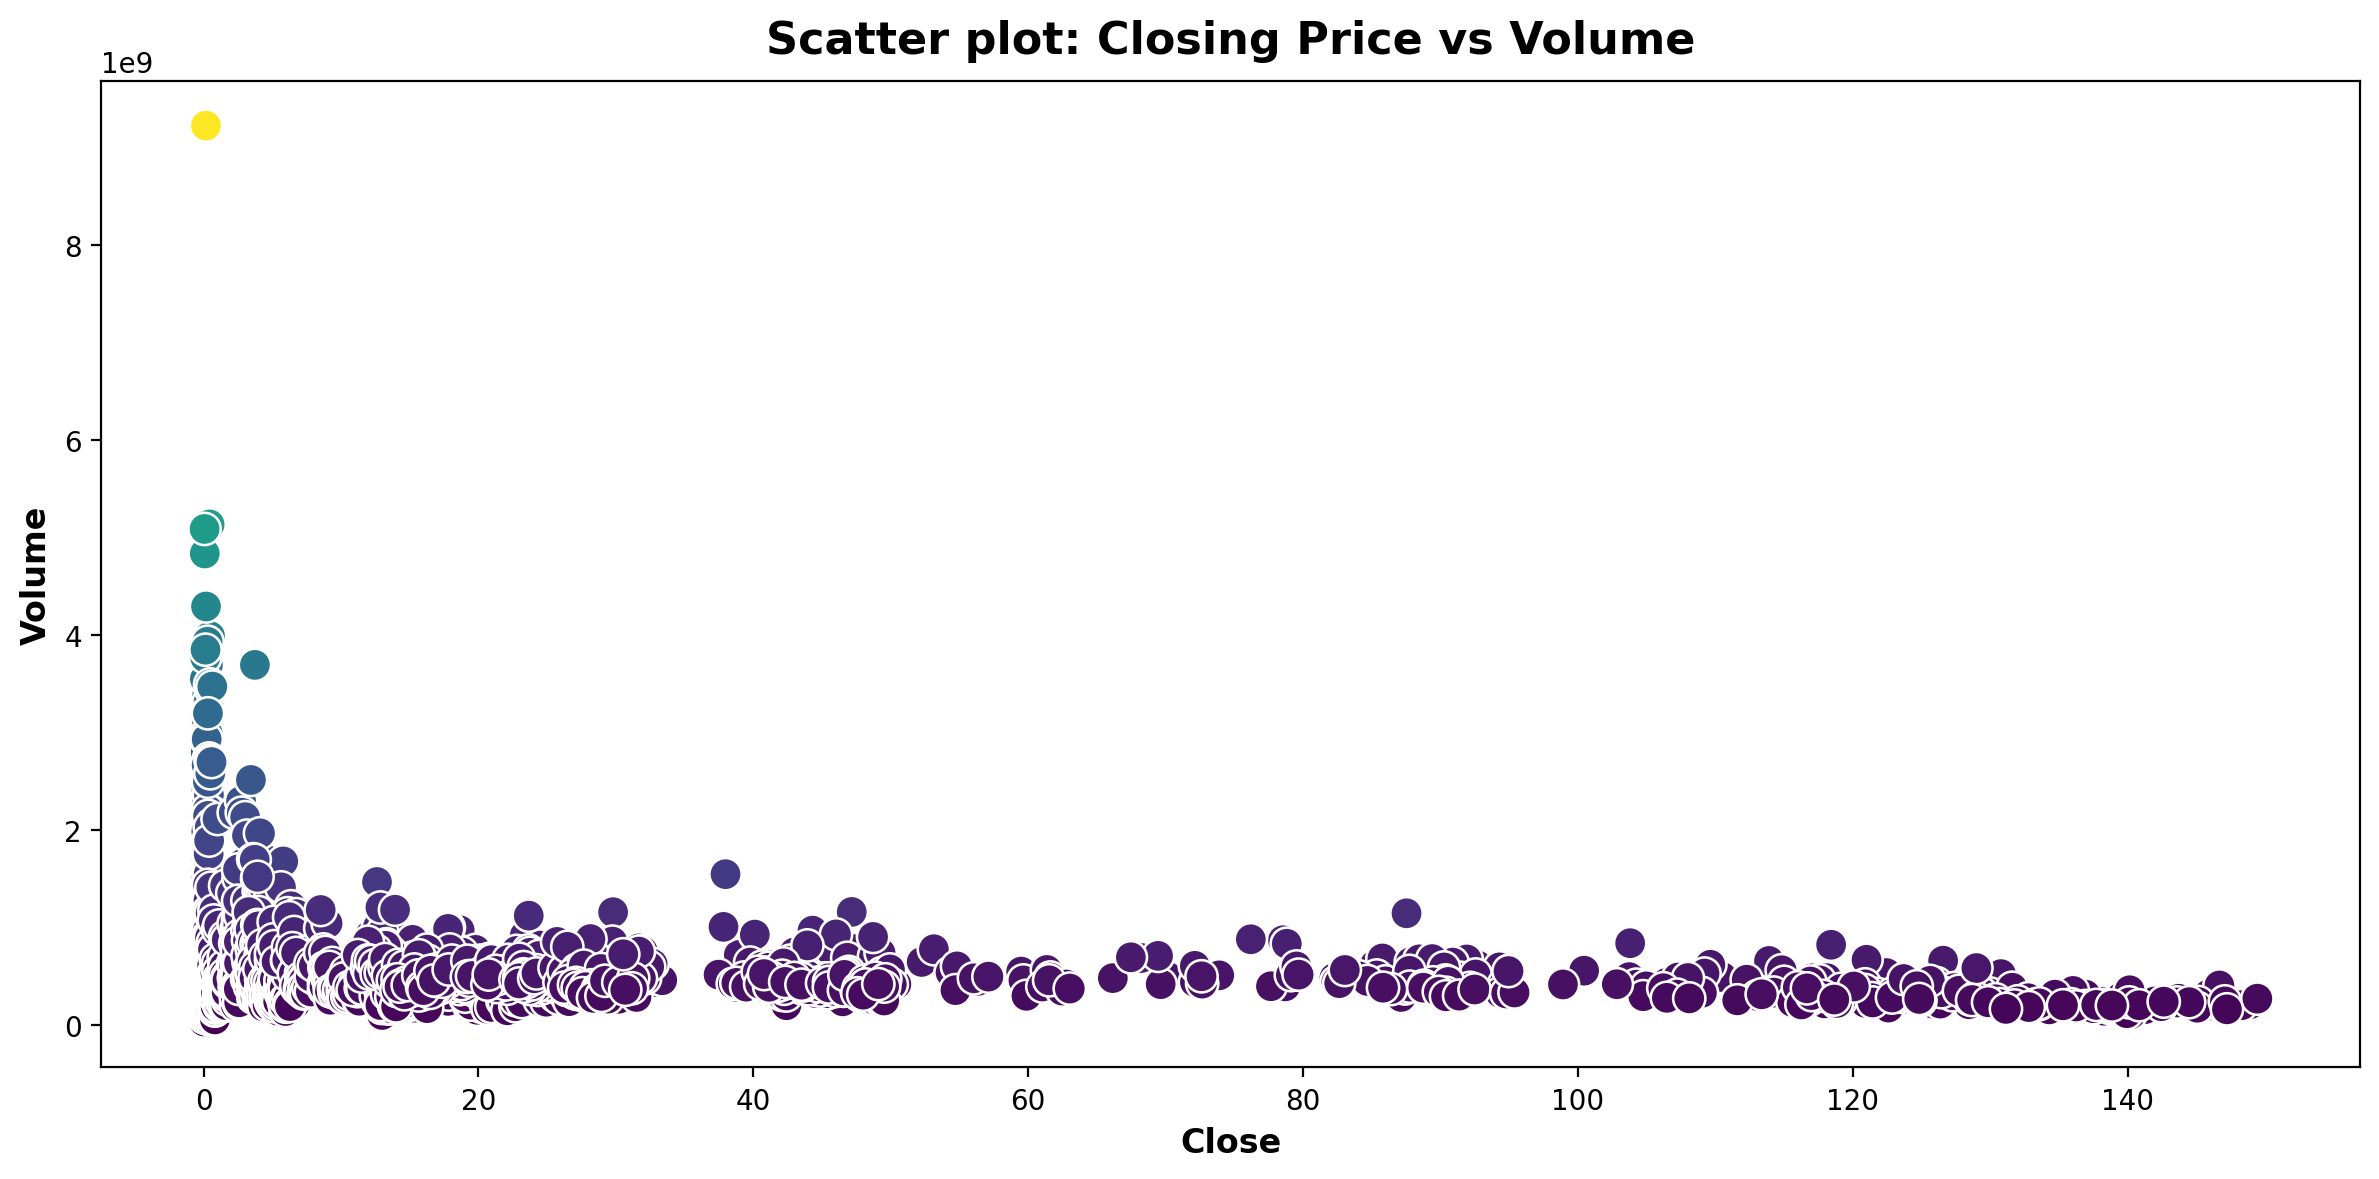

In [9]:
sns.scatterplot(x='Close', y='Volume', data=df, hue='Volume', palette='viridis', legend=False,
               s=135)
plt.title('Scatter plot: Closing Price vs Volume')

Text(0.5, 1.0, 'Scatter plot: Closing Price vs Volume')

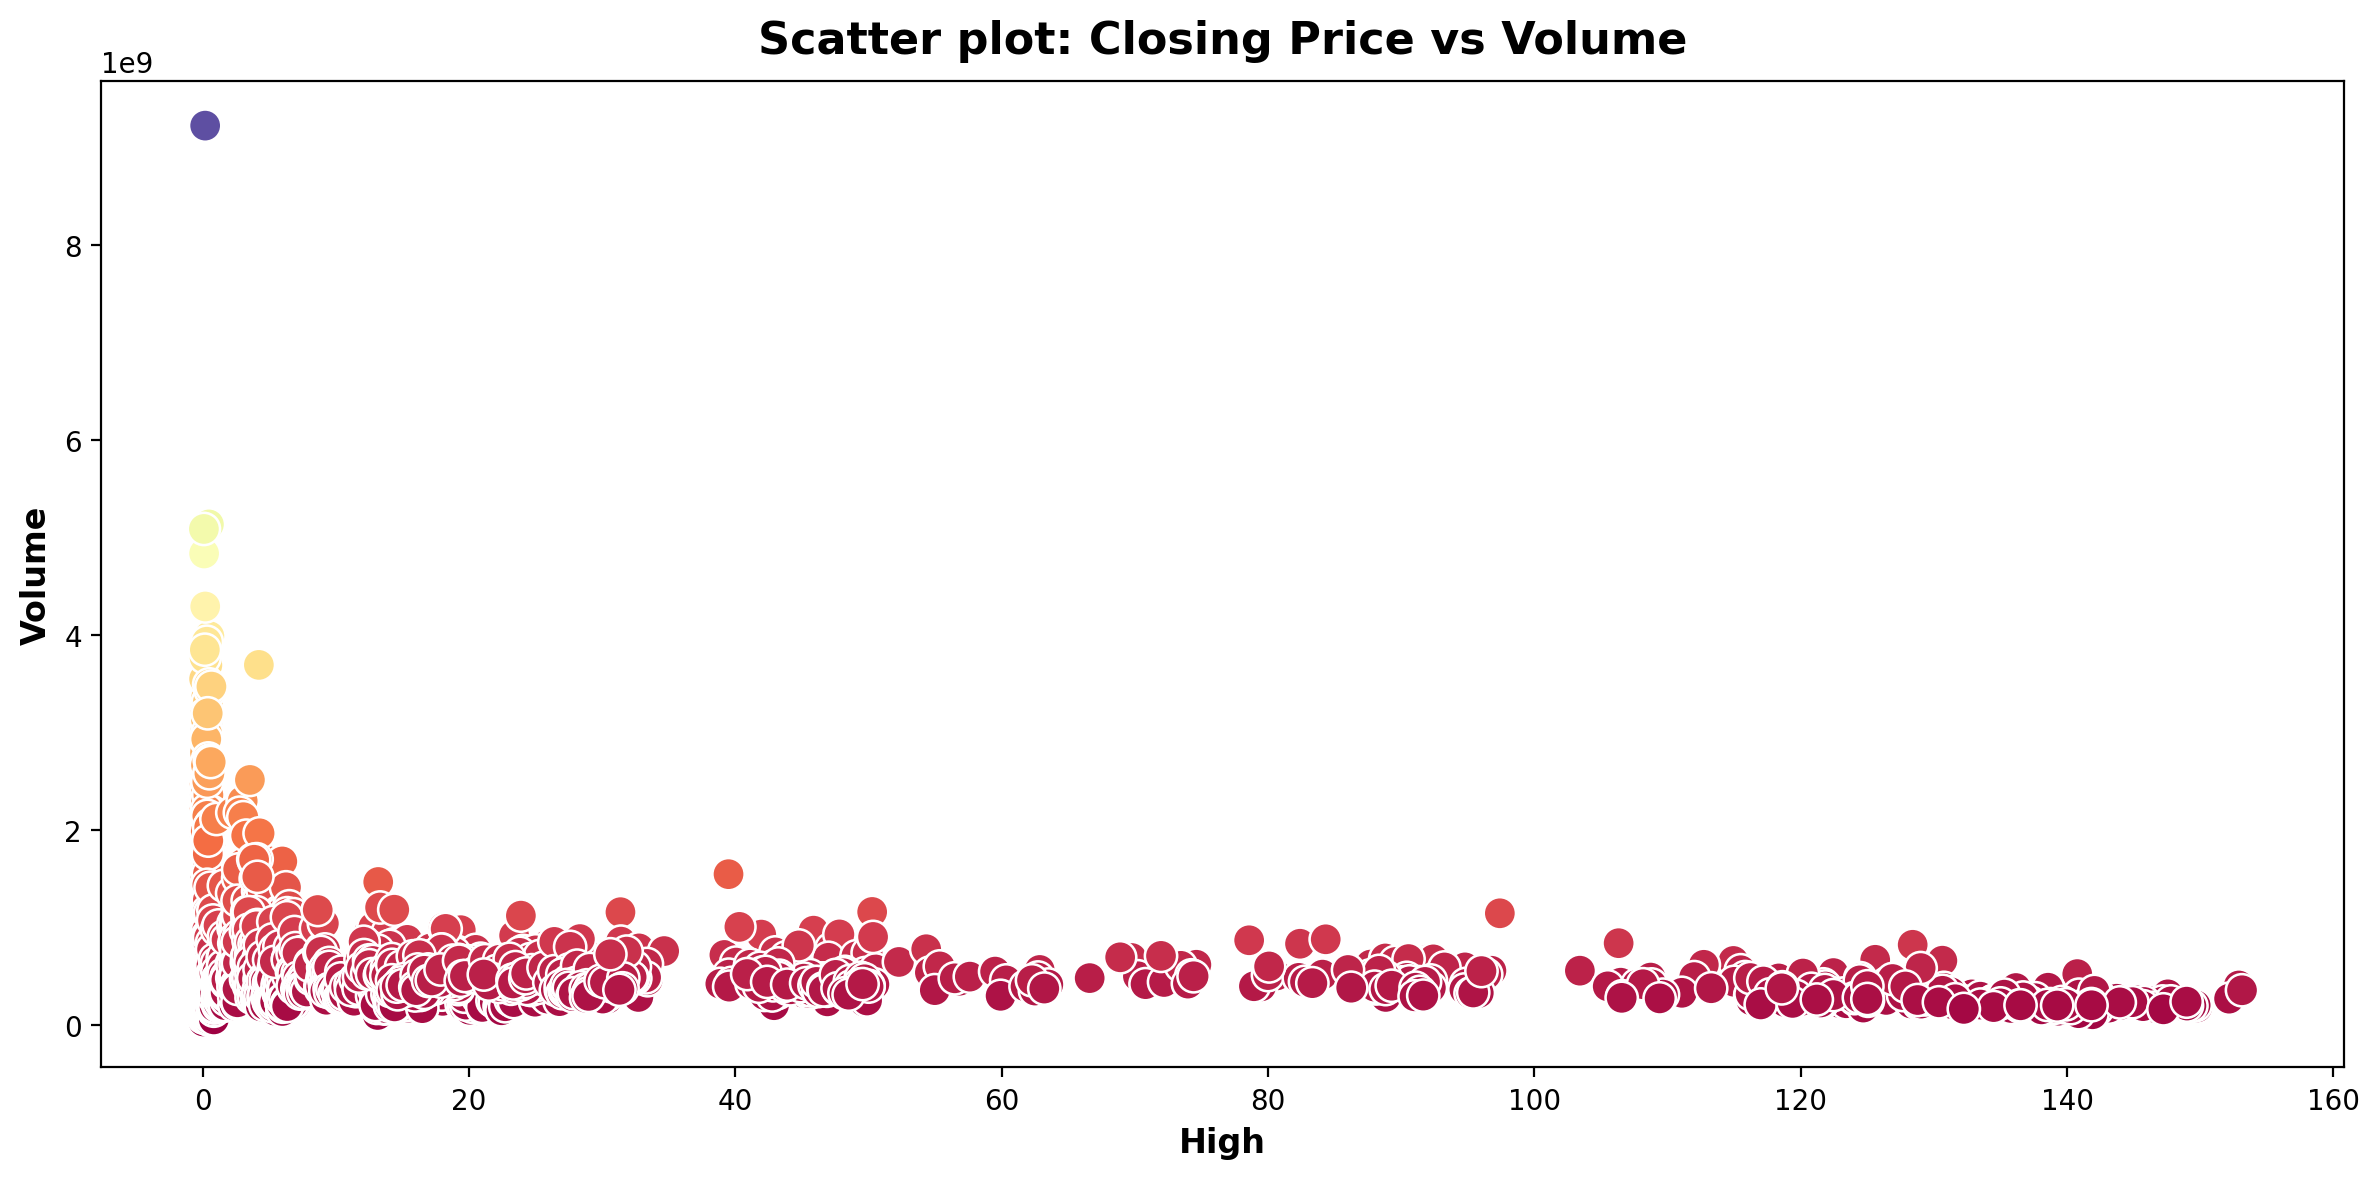

In [10]:
sns.scatterplot(x='High', y='Volume', data=df, hue='Volume', palette='Spectral', legend=False,
               s=135)
plt.title('Scatter plot: Closing Price vs Volume')

## Lineplot

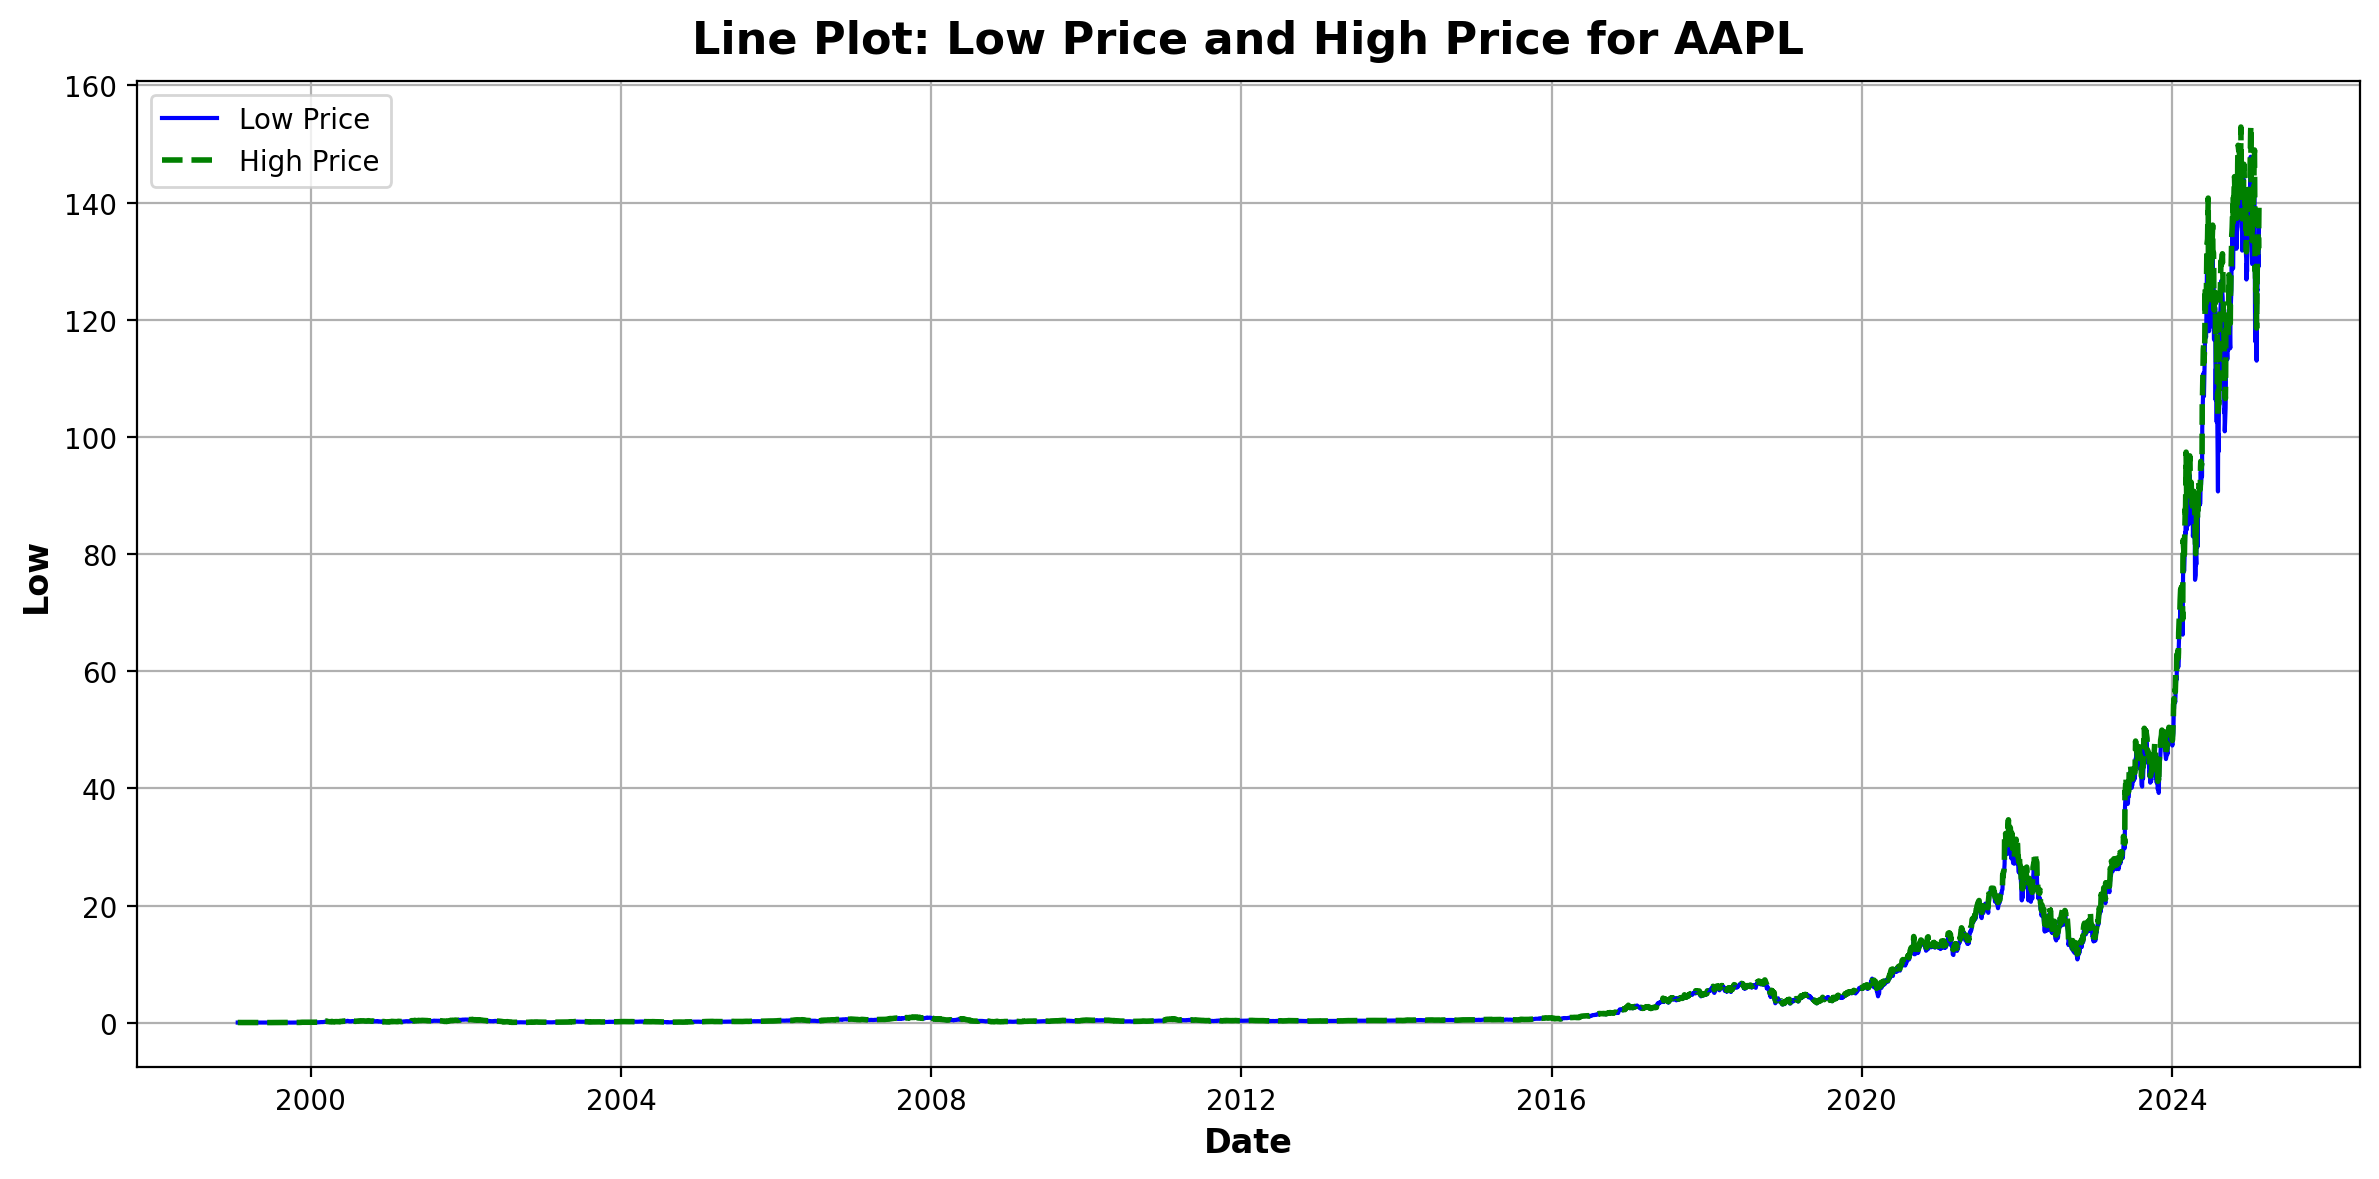

In [11]:
fig, axs = plt.subplots()
axs = sns.lineplot(ax=axs, x=df.index, y=df['Low'], label='Low Price', color='blue', linewidth=1.5)
_ = sns.lineplot(ax=axs, x=df.index, y=df['High'], label='High Price', color='green', linestyle='--', linewidth=2)
plt.title('Line Plot: Low Price and High Price for AAPL')
plt.grid()

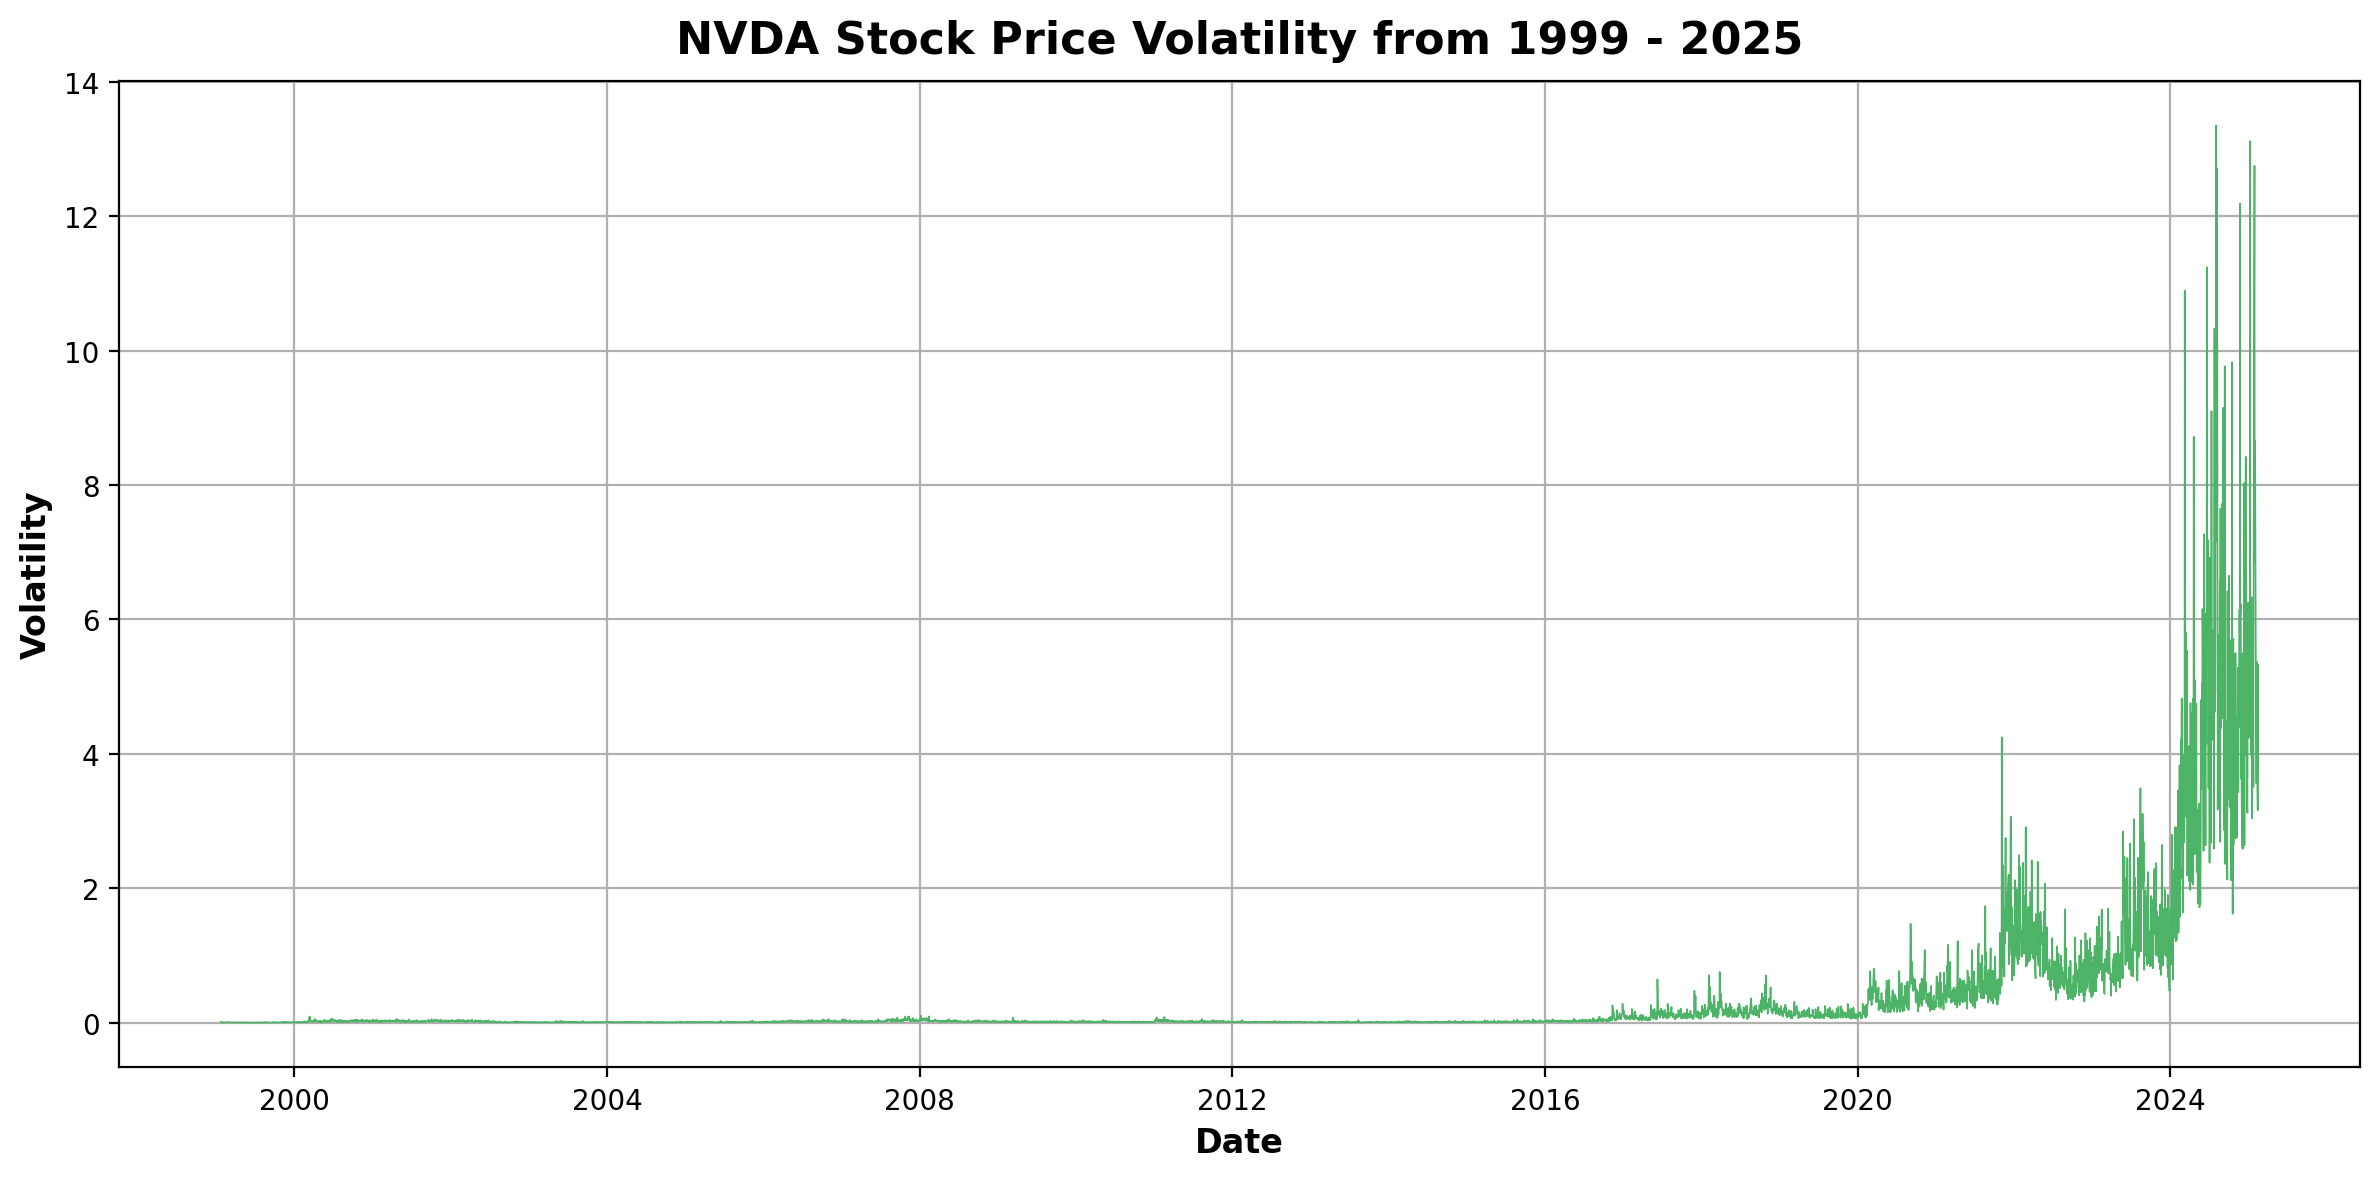

In [12]:
df['Volatility'] = df['High'] - df['Low']
sns.lineplot(x=df.index, y='Volatility', data=df, color=(0.3, 0.7, 0.4), linewidth=0.6)
plt.title('NVDA Stock Price Volatility from 1999 - 2025')
plt.grid()


## Moving averages of Close Price

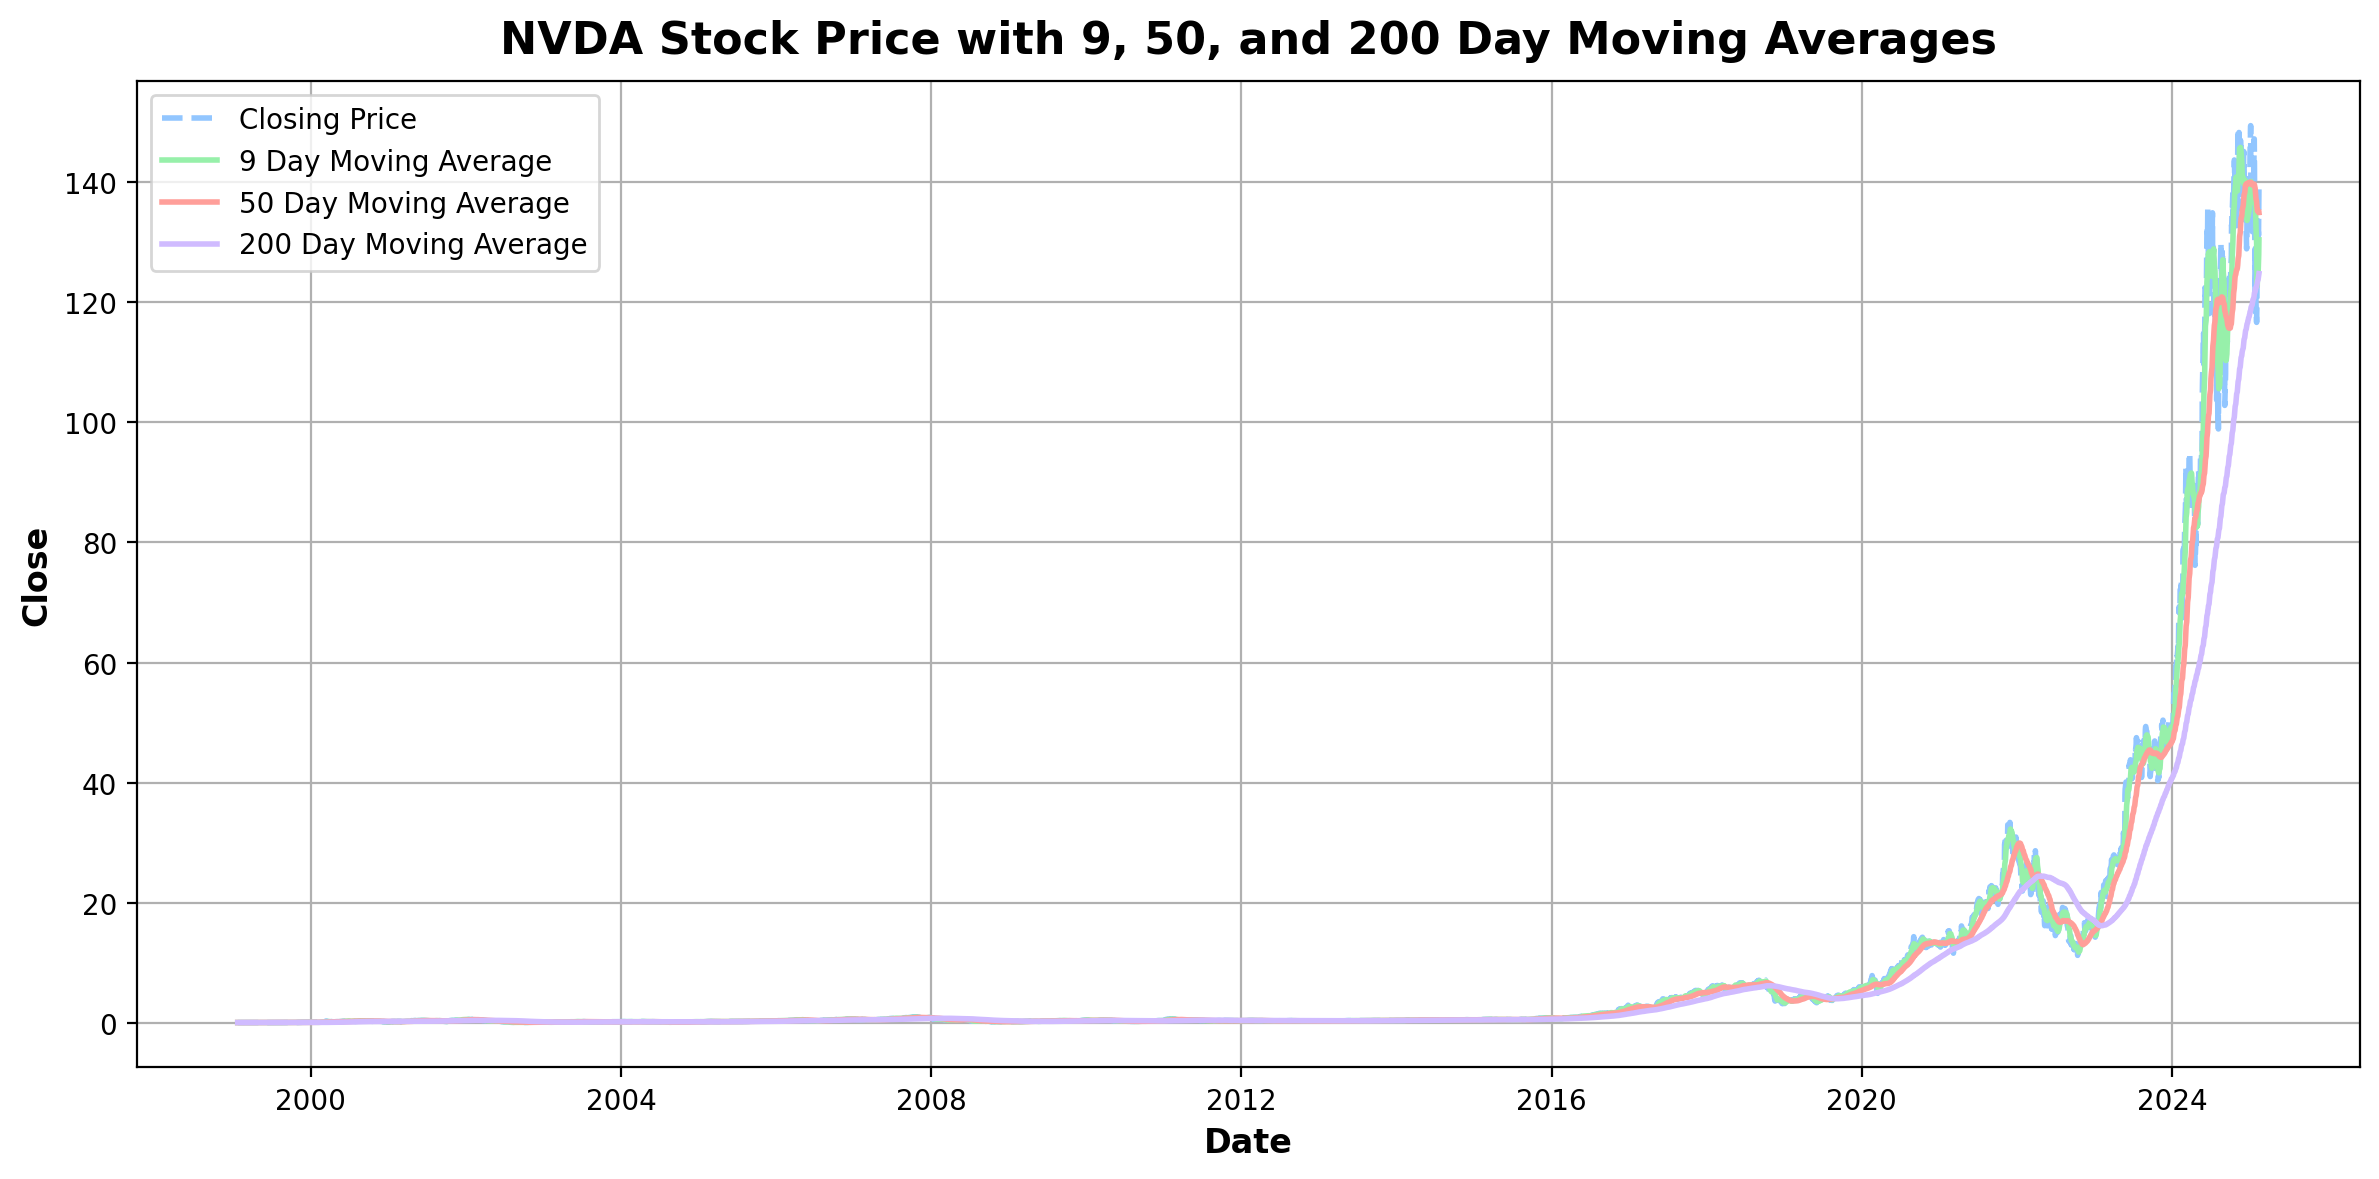

In [13]:
df['MA9'] = df['Close'].rolling(window=9, min_periods=1).mean()
df['MA50'] = df['Close'].rolling(window=50, min_periods=1).mean()
df['MA200'] = df['Close'].rolling(window=200, min_periods=1).mean()
fig, axs = plt.subplots()
axs = sns.lineplot(x=df.index, y=df['Close'], label='Closing Price', linewidth=2, linestyle='--')
axs = sns.lineplot(x=df.index, y=df['MA9'], label='9 Day Moving Average', linewidth=2)
axs = sns.lineplot(x=df.index, y=df['MA50'], label='50 Day Moving Average', linewidth=2)
axs = sns.lineplot(x=df.index, y=df['MA200'], label='200 Day Moving Average', linewidth=2)
plt.title('NVDA Stock Price with 9, 50, and 200 Day Moving Averages')
plt.grid()

## Moving averages of Volume

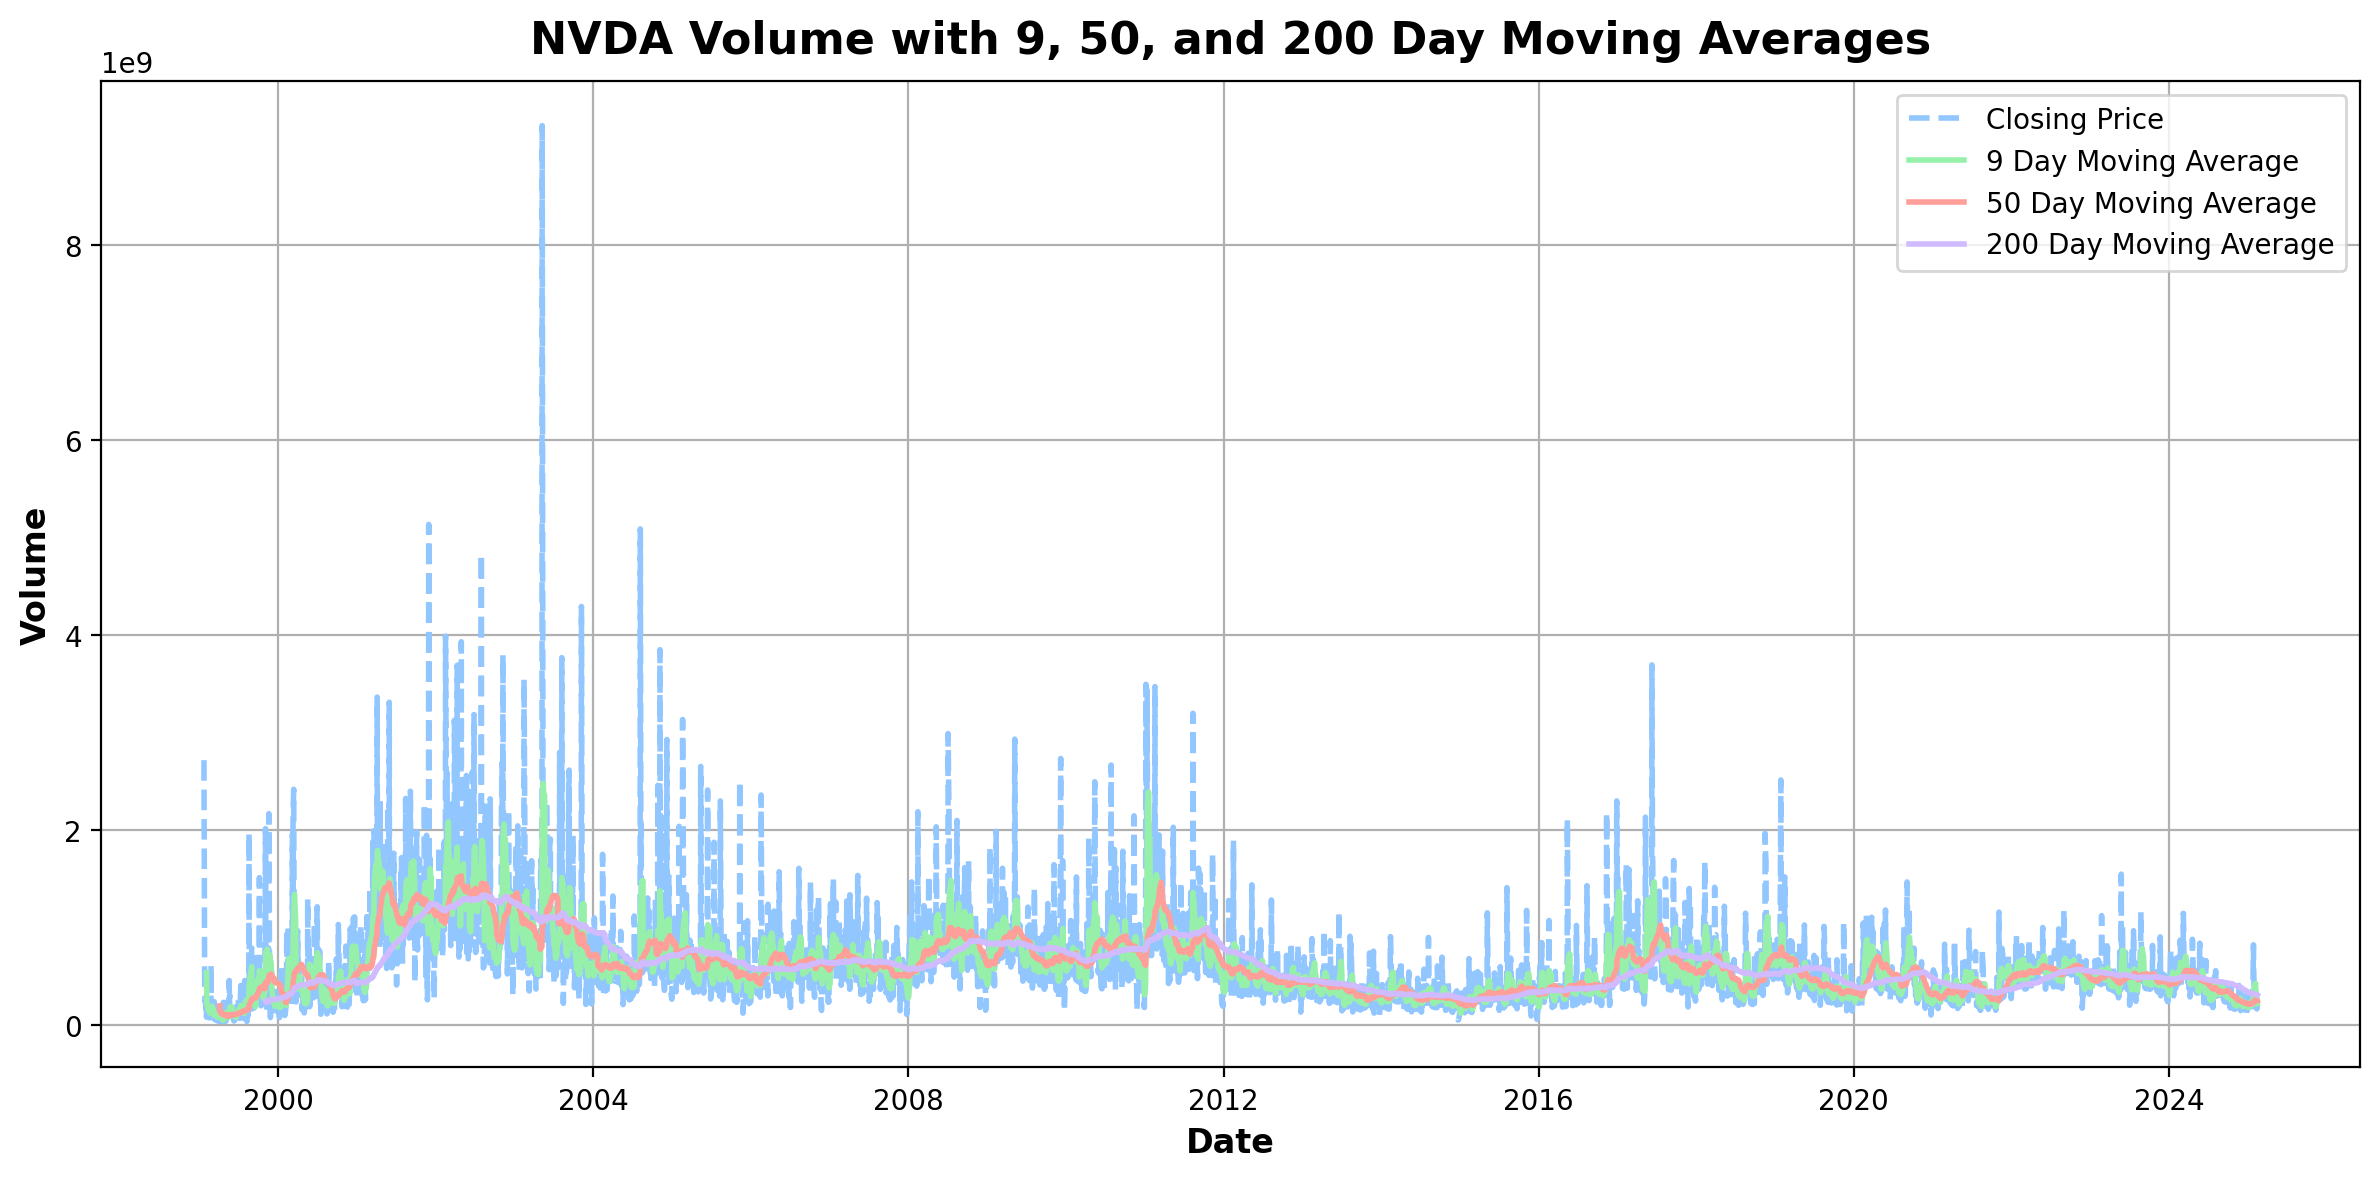

In [14]:
df['MA9_vol'] = df['Volume'].rolling(window=9).mean()
df['MA50_vol'] = df['Volume'].rolling(window=50).mean()
df['MA200_vol'] = df['Volume'].rolling(window=200).mean()
fig, axs = plt.subplots()
axs = sns.lineplot(x=df.index, y=df['Volume'], label='Closing Price', linewidth=2, linestyle='--')
axs = sns.lineplot(x=df.index, y=df['MA9_vol'], label='9 Day Moving Average', linewidth=2)
axs = sns.lineplot(x=df.index, y=df['MA50_vol'], label='50 Day Moving Average', linewidth=2)
axs = sns.lineplot(x=df.index, y=df['MA200_vol'], label='200 Day Moving Average', linewidth=2)
plt.title('NVDA Volume with 9, 50, and 200 Day Moving Averages')
plt.grid()

## Relative Strength

In [15]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
av_gain = gain.rolling(window=14).mean()
av_loss = loss.rolling(window=14).mean()
rs = av_gain / av_loss
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'] = df['RSI'].fillna(0.0)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


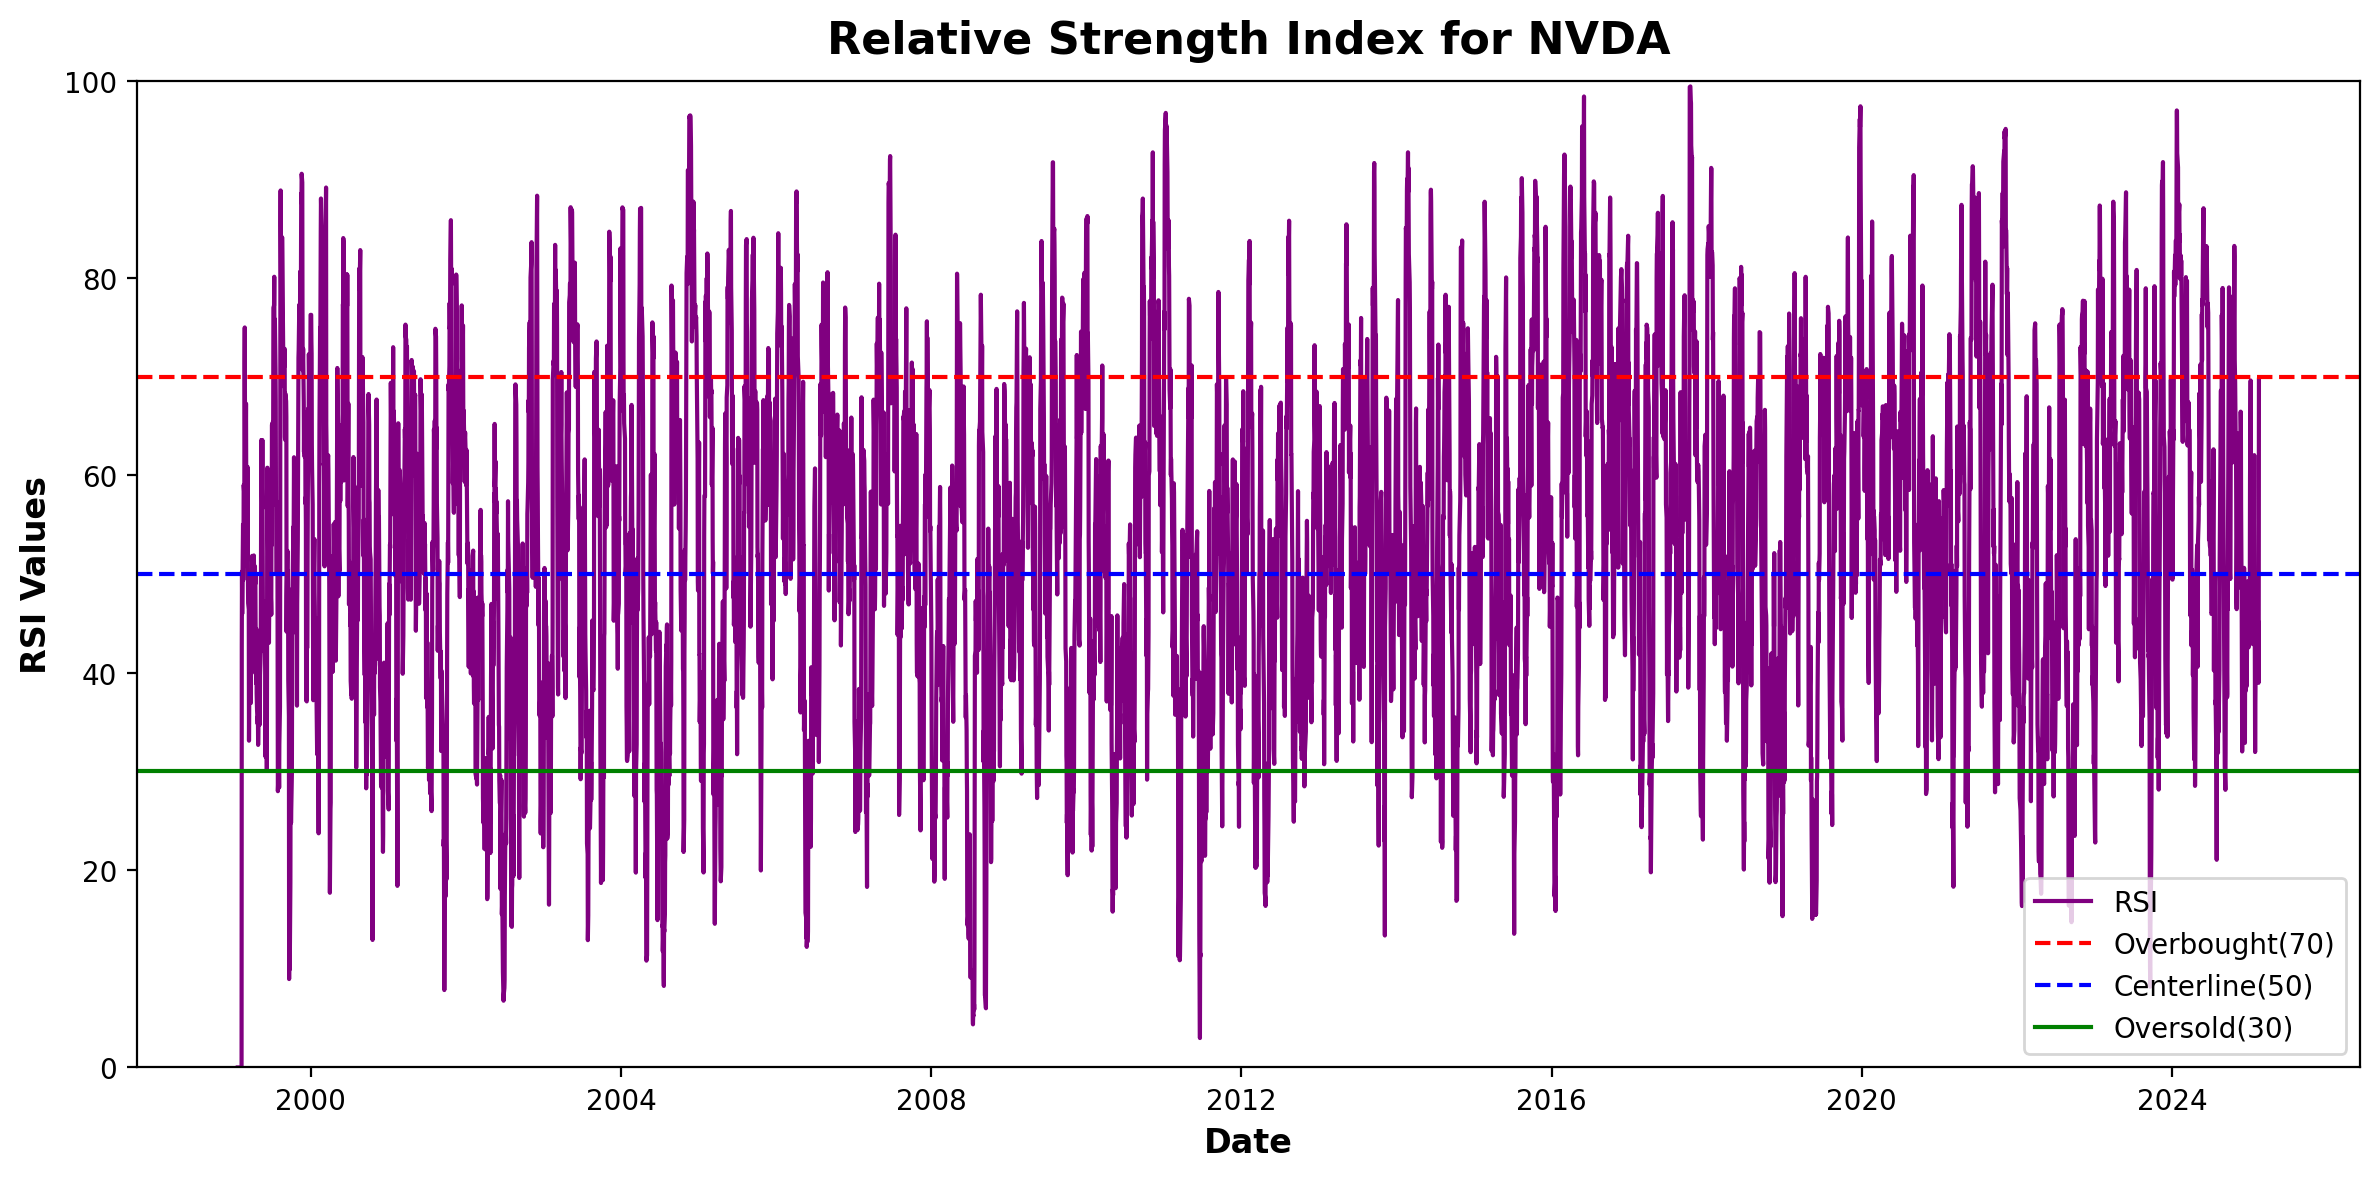

In [16]:
fig, ax2 = plt.subplots()
ax2.plot(df.index, df['RSI'], label='RSI', color='Purple')
ax2.set_ylabel('RSI Values')
ax2.set_xlabel('Date')
ax2.set_title('Relative Strength Index for NVDA')
ax2.set_ylim(0, 100)
ax2.axhline(70, color='red', linestyle='--', label='Overbought(70)')
ax2.axhline(50, color='blue', linestyle='--', label='Centerline(50)')
ax2.axhline(30, color='green', linestyle='-', label='Oversold(30)')
plt.legend()

RSI helps identify overbought (above 70) or oversold (below 30) conditions

## Correlation matrix

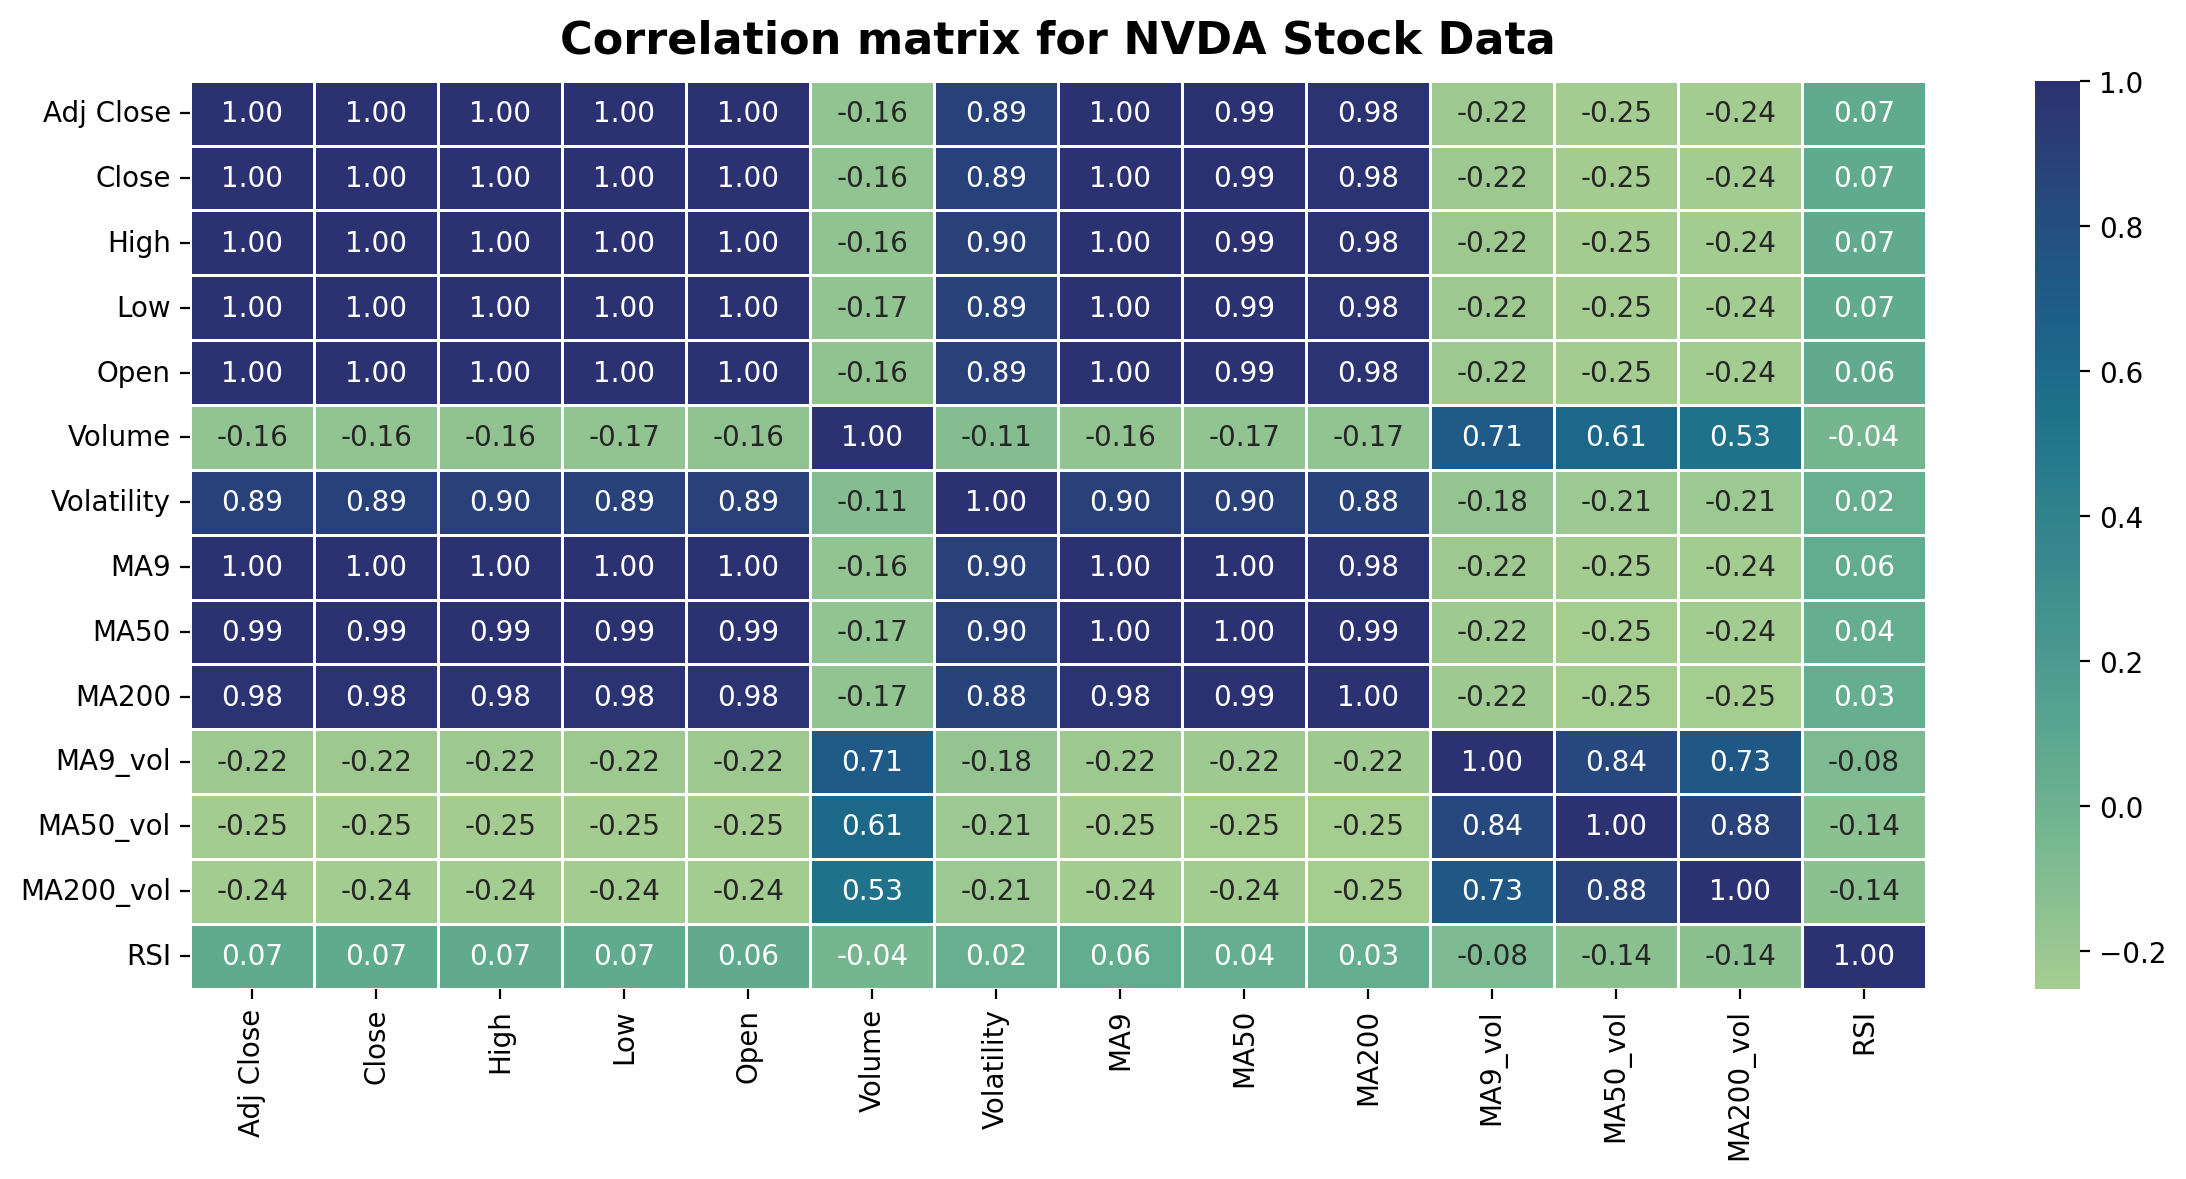

In [17]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='crest')
plt.title('Correlation matrix for NVDA Stock Data')
plt.show()